<a href="https://colab.research.google.com/github/kerul31/Google_Colab_Modules/blob/Interactive_modules/SAS_birds_assignment_regression_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Connect to a SAS session using SAS OnDemandAcademics account.

In [ ]:
!pip install saspy
import saspy
saspy
sas = saspy.SASsession(java='/usr/bin/java', iomhost=['odaws01-usw2.oda.sas.com','odaws02-usw2.oda.sas.com','odaws03-usw2.oda.sas.com','odaws04-usw2.oda.sas.com'], iomport=8591, encoding='utf-8')

     |████████████████████████████████| 6.4MB 12.3MB/s 
  Created wheel for saspy: filename=saspy-3.7.2-cp37-none-any.whl size=6419248 sha256=e4720eeb1f891d49e048332d59a79c7b50e1084381a31d817f96b3e7327dc0cb
  Stored in directory: /root/.cache/pip/wheels/97/15/b9/04c61c8b6c0e6b28e8e8772af8b4e4b71312978e9107c3f71b
Successfully built saspy
Using SAS Config named: default
Please enter the IOM user id: kerulsuthar@gmail.com
Please enter the password for IOM user : ··········
SAS Connection established. Subprocess id is 92



Import the data

In [ ]:
sas.submitLST("""
filename myfile url 'http://www.auburn.edu/~zengpen/teaching/STAT-7000/datasets/birds.csv';
proc import out = birds
datafile = myfile dbms = csv replace;
run;
""")

Print the data

In [ ]:
sas.submitLST("""
proc print data=birds;
run;
""")

Obs,SPECIES,TIME,PAIRS,SIZE,STATUS
1,Sparrowhawk,3.03,1,L,R
2,Buzzard,5.46,2,L,R
3,Kestrel,4.1,1.21,L,R
4,Peregrine,1.68,1.13,L,R
5,Grey_partridge,8.85,5.17,L,R
6,Quail,1.49,1,L,M
7,Red-legged_partridge,7.69,2.75,L,R
8,Pheasant,3.85,5.63,L,R
9,Water_rail,16.67,3,L,R
10,Corncrake,4.22,4.67,L,M


## 1(a)

Scatter plot analysis:


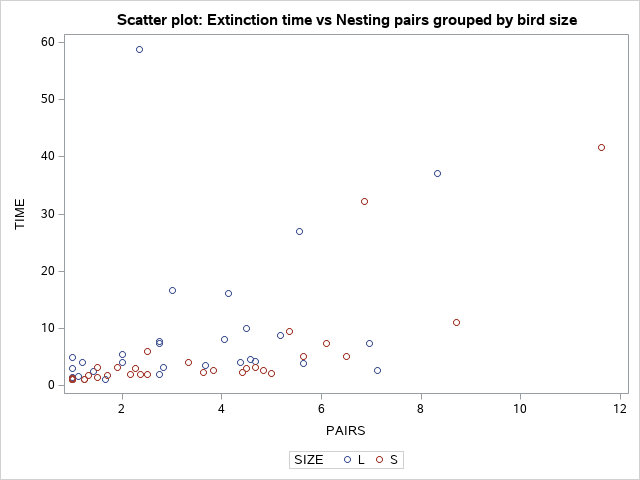

In [ ]:
sas.submitLST("""
proc sgplot data = birds;
scatter y =time x = pairs / group = size;
title Scatter plot: Extinction time vs Nesting pairs grouped by bird size ;
run;
""")

This is a scatter plot showing exploratory data analysis. The scatter plot shows Time vs Pairs and the data points are grouped by the size of birds.

It may be safe to assume that birds that are small in size in general are extinct earlier than the birds that are relatively larger in size


### **Question: Create a scatter plot of Extinction time vs Nesting pairs and group them by migration status. Explain what you observe in here and add any comments.**

In [ ]:
#########################################

      # Add your code in here #

#########################################


####################################

Add your explanation in here

####################################



## 1a) Continued..

Variable transformation and dummy variables

In [ ]:
sas.submitLST("""
data h1a;
set birds;
TIME_log = log(time);
if size = 'L' then size_bin = 1; else size_bin = 0;
if status = 'M' then status_bin = 1; else status_bin = 0;
px2 = pairs * size_bin; px3 = pairs * status_bin; x2x3 = size_bin * status_bin;
px2x3 = pairs * size_bin * status_bin;
proc print data = h1a (obs=10);
run;

""")

Obs,SPECIES,TIME,PAIRS,SIZE,STATUS,TIME_log,size_bin,status_bin,px2,px3,x2x3,px2x3
1,Sparrowhawk,3.03,1,L,R,1.10856,1,0,1.00,0.00,0,0.00
2,Buzzard,5.46,2,L,R,1.69745,1,0,2.00,0.00,0,0.00
3,Kestrel,4.1,1.21,L,R,1.41099,1,0,1.21,0.00,0,0.00
4,Peregrine,1.68,1.13,L,R,0.51879,1,0,1.13,0.00,0,0.00
5,Grey_partridge,8.85,5.17,L,R,2.18042,1,0,5.17,0.00,0,0.00
6,Quail,1.49,1,L,M,0.39878,1,1,1.00,1.00,1,1.00
7,Red-legged_partridge,7.69,2.75,L,R,2.03992,1,0,2.75,0.00,0,0.00
8,Pheasant,3.85,5.63,L,R,1.34807,1,0,5.63,0.00,0,0.00
9,Water_rail,16.67,3,L,R,2.81361,1,0,3.00,0.00,0,0.00
10,Corncrake,4.22,4.67,L,M,1.43984,1,1,4.67,4.67,1,4.67


## Scatter plot analysis based on the log transformation of time


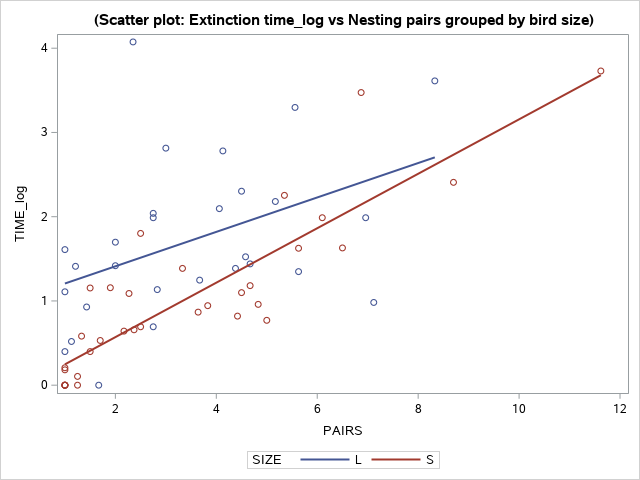


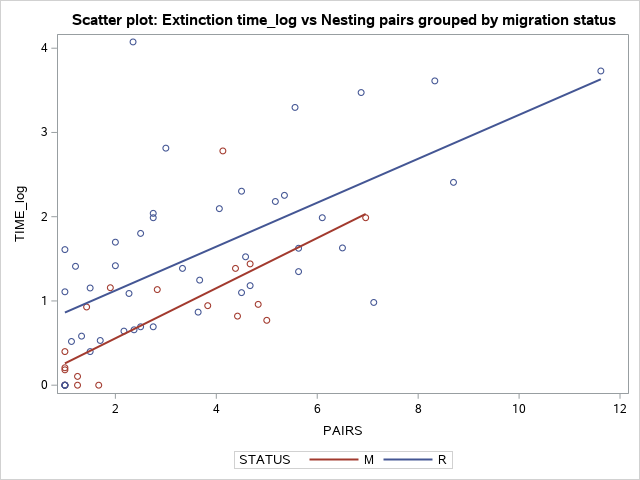

In [ ]:
sas.submitLST("""
proc sgplot data = h1a;
reg y =time_log x = pairs / group = size;
title(Scatter plot: Extinction time_log vs Nesting pairs grouped by bird size);
run;
""")

sas.submitLST("""

proc sgplot data = h1a;
reg y =time_log x = pairs / group = status;
title Scatter plot: Extinction time_log vs Nesting pairs grouped by migration status;
run;

""")


The scatter plots show an improved relationship between the variables and time_log in comparison to the original variable time of extinction. 

## 1(b) Write out the null and hypothesis corresponding to the question? 
Is there a linear association between the response and the three explanatory variables?

The null and alternative hypothesis are
H0 : β1 = β2 = β3 = 0; Ha : at least one of β1, β2, β3 is not zero:

## 1(c) Construct the ANOVA table associated with the F-test in the previous question. What is the distribution of the F-statistic under H0? What is the conclusion of this test?

### ANOVA Analysis


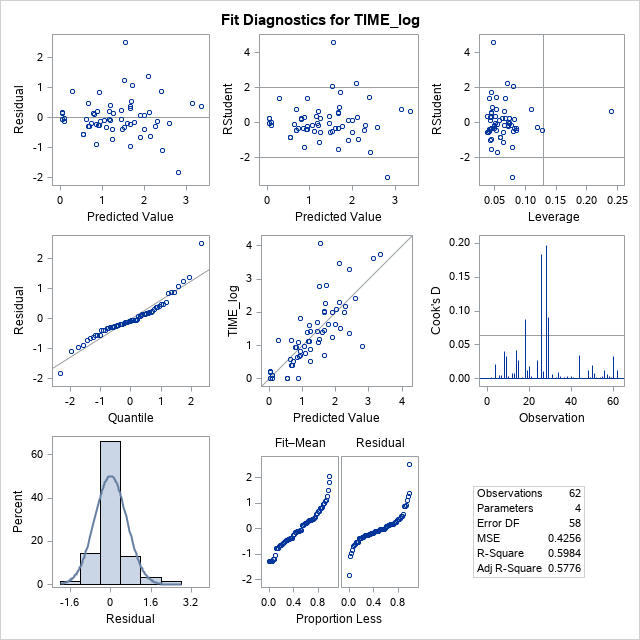
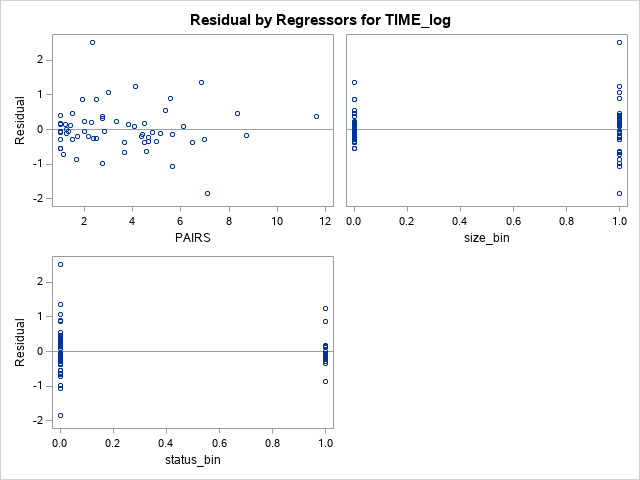

In [ ]:
sas.submitLST("""
proc reg data = h1a;
model time_log= pairs size_bin status_bin / clb;
title 'ANOVA analysis for relationship between time and pairs, status and size';
run;
""")

The ANOVA table shows a p-value < 0.0001. This means we reject the null hypothesis and teh coefficients are not zero. We accept the alternative hypothesis which means that atleast one coefficient is non-zero which means a linear relationship exists between the Time of extinction and the pairs, status and size of the birds.

## 1(d) Fitted regression function

The fitted regression function is
ŷ = 0.28225 + 0.26509*(pairs) + 0.65237*(size_bin) - 0.50406*(status_bin)

## 1(e) Fitted regression function for large birds:

For large resident birds , if size_bin=1, status_bin=0 

ŷ = 0.93462 + 0.26509* (pairs)

## 1(f) Expected average time for extinction for small migrant birds with 3 nesting pairs.

exp(ŷ)= exp(0.28225 + 0.26509 x 3.0 - 0.50406) = 1.774

## 1(g) Does the size of the bird have any eect on the average time of extinction after accounting for number of nesting pairs and migratory status? Write out the null and alternative hypothesis. Report the results of the test (statistic, distribution under H0, and conclusion).

The null and alternative hypothesis are H0 : β2 = 0; Ha :β2 is not zero.

Seeing from the table above, for Size, the standard error is 0.1665 with a t value of 3.91 and a p-value of 0.0002. Hence we reject the null hypothesis. This means that the size of the birds does have an effect on the time of extinction after accounting for the status and number of nesting pairs.

## 1(h) Interpret the meaning of β1?
To interpret the meaning of β1, we set the value of status and size to be constant and check the effect of pairs on the average time of extinction

(e^(26509) = 1.303548)

This means, for every unit increase in the number of nesting pairs, the extinction time increases by 30 %, which also implies that higher number of nesting pairs aids the preservation of birds, given same size and same status.

## 1(i) Construct a 95% confidence interval for β1 and interpret it.
 The 95% confidence intervals for β1 are 0.19145 and 0.33872. When plugginh this into the regression equaation, the value of Y is between 1.211 and 1.40. This means that the average extinction time increases by 21.1 % to 40 % when a nesting pair is increases, given same size and migration status of a bird.


## 1(j) Interpret the meaning of β2?
(e^0.65237 = 1.92)
The time of extinction for larger birds is 1.92 times the smaller birds, given the same nesting pairs and migratory status of the birds.

This means that larger birds will take longer time to be extinct in comparison to the smaller birds.

## 1(k) Construct a 95% confidence interval for β2 and interpret it.

As seen in the table above, the 95% confidence limits are 0.31878	 and 0.98596. Plugging them in the equation (e^0.31878 = 1.375 and e^0.98596 = 2.680). This means the time of extinction for the larger birds is 1.31 to 2.68 times the smaller birds given the same number of nesting pairs and migratory status.

## 1(l) Interpret the meaning of β3.
(e^0.50406 = 0.604)
The time of extinction for migrant birds is 60.4% of that for resident birds with the same number of nesting pairs and size. 


## Regression analysis : Predicting Time_log using other predictors


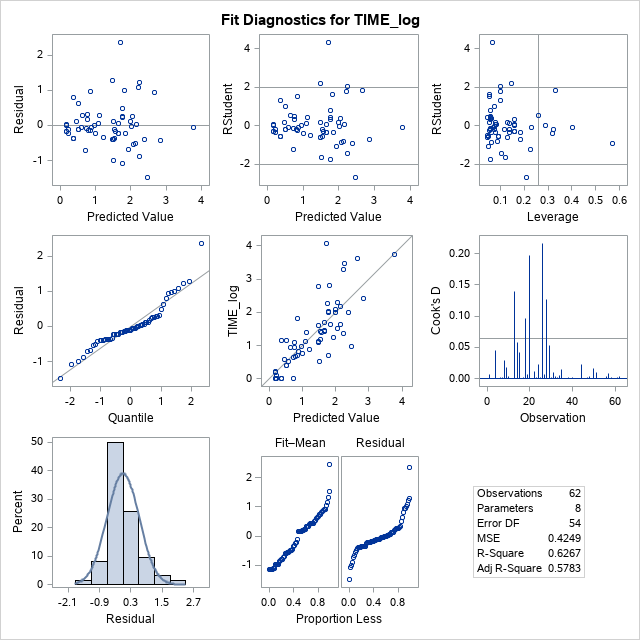
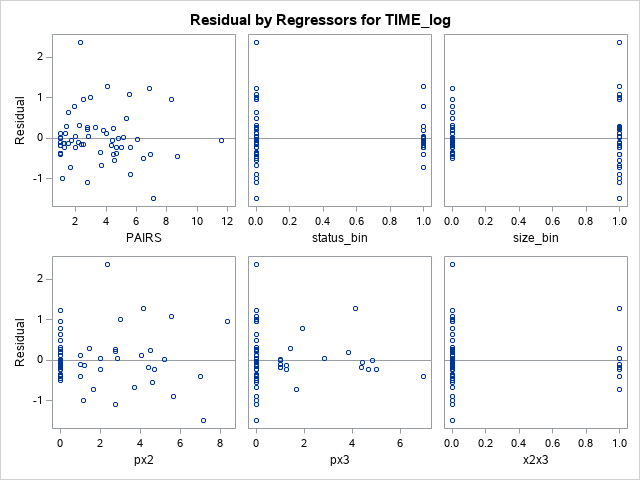
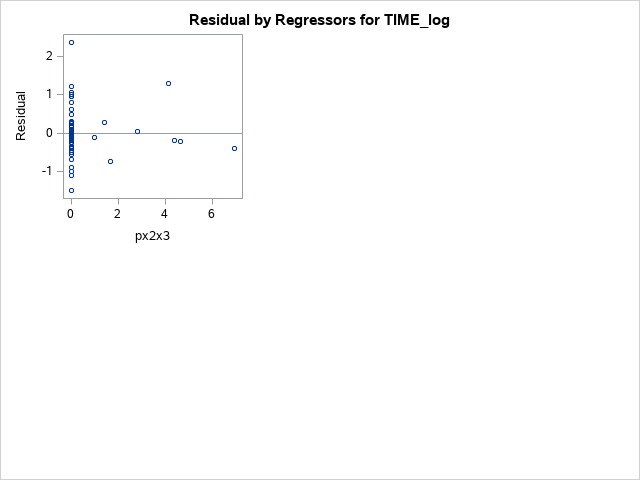

In [ ]:
sas.submitLST("""
proc reg data = h1a;
model time_log= pairs status_bin size_bin px2 px3 x2x3 px2x3 / clb;
test px2 = 0, px3 = 0, x2x3 = 0, px2x3 = 0;
title 'Regression analysis for predicting log of time using transformed variables and pairs';
run;
""")

## Regression analysis : Prediciting Time using other predictors

###  **Question: Predict extinction time using other predictors and interaction variables as well.**
**a) Comment on the results.**  \
**b) Do the results improve?** \
**c) What predictors are important?** \
**d) Write the fitted regression function.**

In [ ]:
#########################################

      # Add your code in here #

#########################################

####################################

Add your explanation in here

####################################

## Regression analysis : Prediciting Time_log using pairs, size and status (No variable interactions considered)


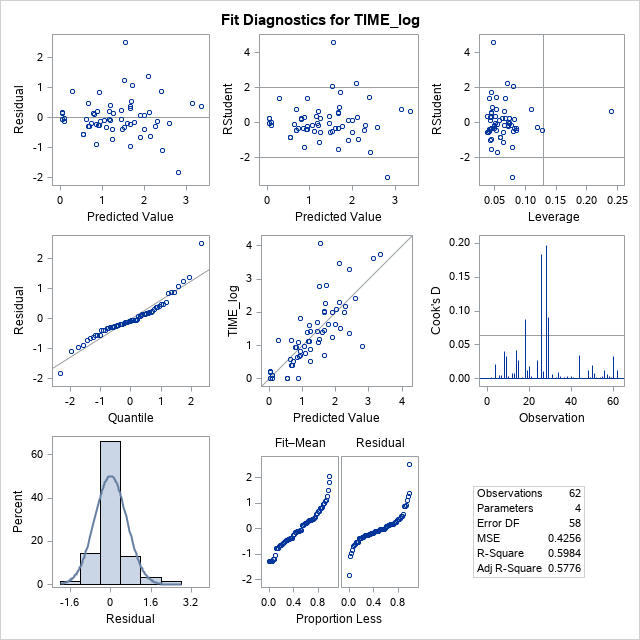
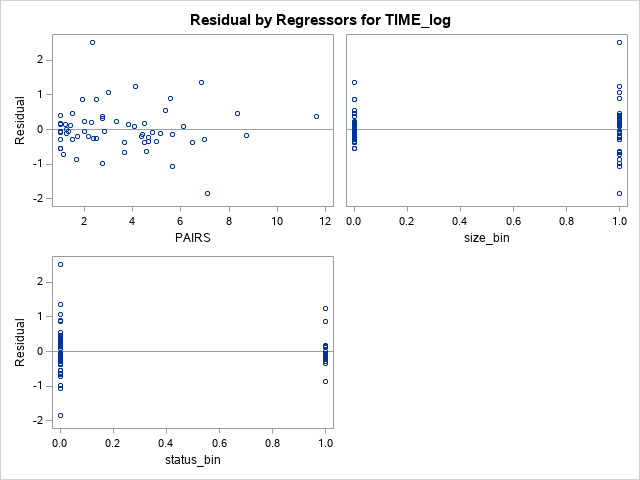

In [ ]:
sas.submitLST("""
proc reg data = h1a;
model time_log= pairs size_bin status_bin  / clb;
test px2 = 0, px3 = 0, x2x3 = 0, px2x3 = 0;
title 'Regression analysis for predicting time_log of extinction based on pairs, size and status of birds ';
run;
""")

## Regression analysis : Prediciting Time using pairs, size and status (No variable interactions considered)


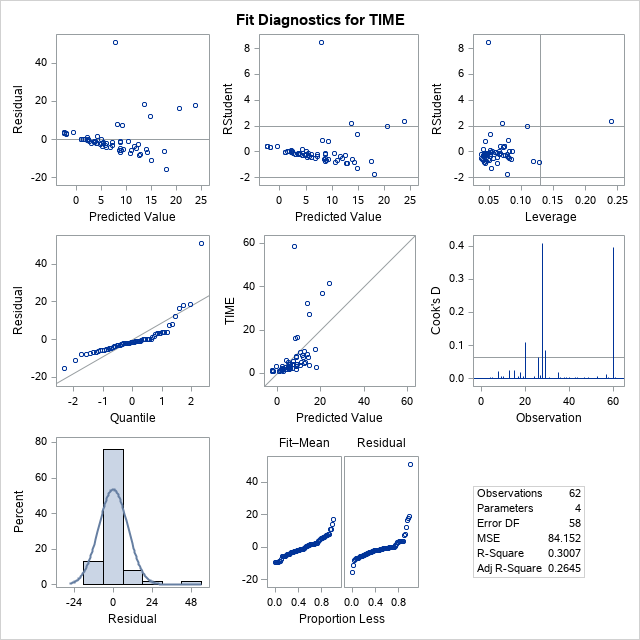
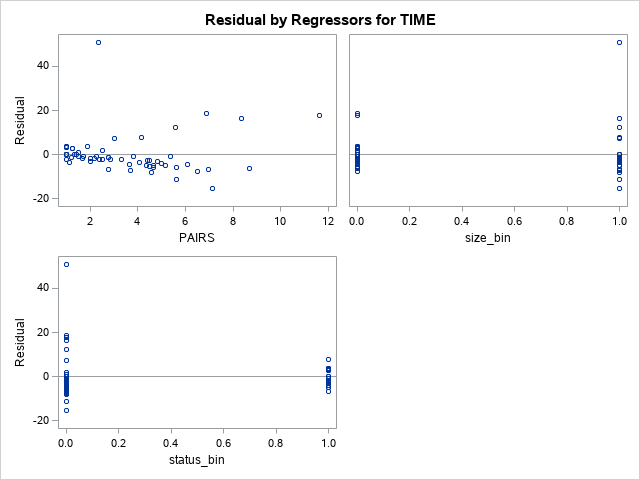

In [ ]:
sas.submitLST("""
proc reg data = h1a;
model time= pairs size_bin status_bin  / clb;
test px2 = 0, px3 = 0, x2x3 = 0, px2x3 = 0;
title 'Regression analysis for predicting time of extinction based on pairs, size and status of birds ';
run;

""")

The results improve significantly when a logarithmic relationship is considered as well. The prediction of logarithmic time is better than the prediction of original time variable.

The results above show that the interaction of variables play an important role and add to improvement in predicting the extinction time of birds.

The residual plots from prediciton show the importance of exponential relationship between the extinction time and the number of nesting pairs. 